In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

- Supervisionado: temos a resposta se cada passageiro foi morto ou não
- Classificação: vamos classificar em dois grupos: os que sobreviveram e os que não sobreviveram

In [179]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [180]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [181]:
train_data = train_data.drop(['Name','Cabin'], axis=1)
test_data = test_data.drop(['Name','Cabin'], axis=1)

In [182]:
media_idade_masc = int(train_data[train_data['Sex'] == 'male']['Age'].mean())
media_idade_femin = int(train_data[train_data['Sex'] == 'female']['Age'].mean())

train_data['Age'] = np.where(
        pd.isna(train_data['Age']) & (train_data['Sex'] == "male"),
        media_idade_masc,
    np.where(pd.isna(train_data['Age']) & (train_data['Sex'] == "female"),
             media_idade_femin,
             train_data['Age']
             )
)
test_data['Age'] = np.where(
        pd.isna(test_data['Age']) & (test_data['Sex'] == "male"),
        media_idade_masc,
    np.where(pd.isna(test_data['Age']) & (test_data['Sex'] == "female"),
             media_idade_femin,
             test_data['Age']
             )
)

In [183]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [184]:
print(train_data['Embarked'].value_counts())
print(train_data['Ticket'].nunique())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
680


In [185]:
train_data = train_data.drop(['Ticket'], axis=1)
train_data['Embarked'] = train_data['Embarked'].replace({
    'S':1,
    'C':2,
    'Q':3
}).astype(int)
train_data['Sex'] = train_data['Sex'].replace({
    'male':1,
    'female':2,
}).astype(int)

test_data = test_data.drop(['Ticket'], axis=1)
test_data['Embarked'] = test_data['Embarked'].replace({
    'S':1,
    'C':2,
    'Q':3
}).astype(int)
test_data['Sex'] = test_data['Sex'].replace({
    'male':1,
    'female':2,
}).astype(int)

C:\Users\iamsa\AppData\Local\Temp\ipykernel_16500\694427090.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Embarked'] = train_data['Embarked'].replace({
C:\Users\iamsa\AppData\Local\Temp\ipykernel_16500\694427090.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Sex'] = train_data['Sex'].replace({
C:\Users\iamsa\AppData\Local\Temp\ipykernel_16500\694427090.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

In [186]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int

<Axes: >

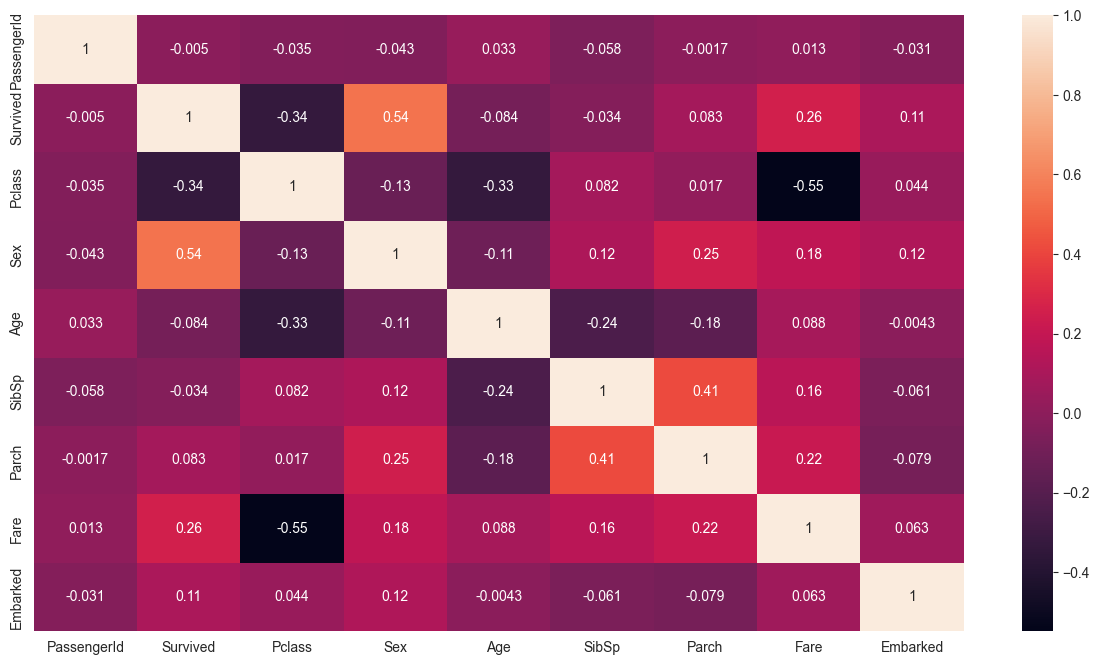

In [187]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [188]:
print(train_data['Survived'].value_counts())
print("Quantidade de mulheres que sobreviveram:",len(train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 2)]))
print("Quantidade de homens que sobreviveram:",len(train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 1)]))

mulher = train_data.loc[train_data.Sex == 2]["Survived"]
porc_mulher = sum(mulher) / len(mulher)

homem = train_data.loc[train_data.Sex == 1]["Survived"]
porc_homem = sum(homem) / len(homem)
print(f"% de mulheres que sobreviveram: {porc_mulher:.2f}")
print(f"% de homens que sobreviveram: {porc_homem:.2f}")

Survived
0    549
1    340
Name: count, dtype: int64
Quantidade de mulheres que sobreviveram: 231
Quantidade de homens que sobreviveram: 109
% de mulheres que sobreviveram: 0.74
% de homens que sobreviveram: 0.19


In [189]:
features = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare", "Embarked"]
#features2 = ["Pclass", "Sex", "Age", "Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
y = train_data['Survived']

* Métodos de classificação que serão usados:
    - DecisionTreeClassifier
    - RandomForestClassifier
    - LogisticRegression
    - svm
    - KNeighborsClassifier

In [190]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [191]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [192]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(solver='lbfgs', max_iter=1000)
lreg = lreg.fit(X, y)

In [193]:
from sklearn import svm

svm_model = svm.SVC()
svm_model = svm_model.fit(X, y)

In [194]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [195]:
predictions = clf.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submissions/submission_clf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


    Feature  Importance
1       Sex    0.309347
5      Fare    0.240429
2       Age    0.227820
0    Pclass    0.111675
3     SibSp    0.053105
4     Parch    0.038905
6  Embarked    0.018719


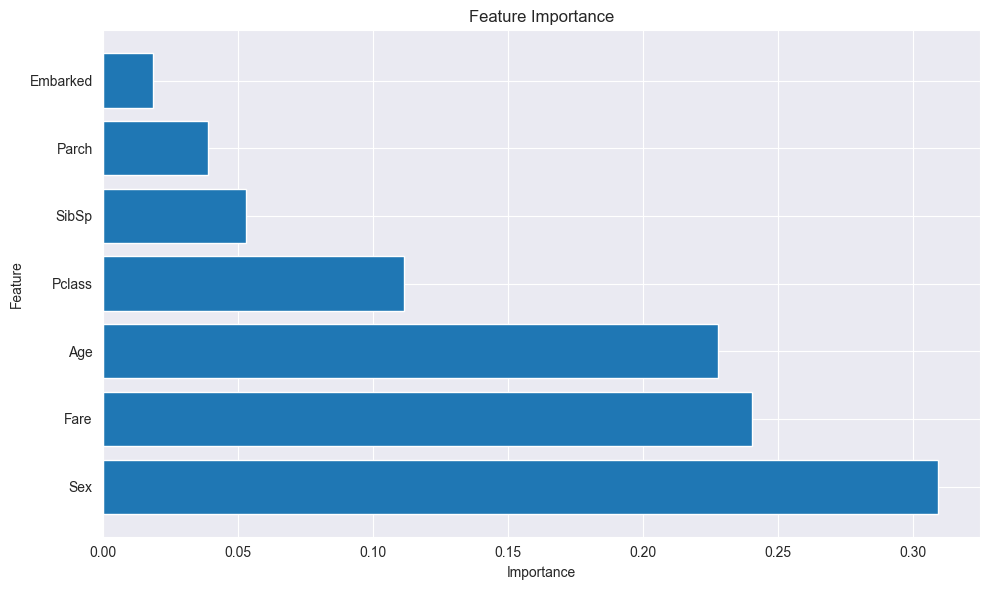

In [196]:
importances = clf.feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f"feature {i}" for i in range(X.shape[1])]

# Criar DataFrame para visualização mais fácil
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

# Visualizar graficamente
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [197]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=35)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
882,3,2,22.0,0,0,10.5167,1
523,1,2,44.0,0,1,57.9792,2
654,3,2,18.0,0,0,6.7500,3
746,3,1,16.0,1,1,20.2500,1
568,3,1,30.0,0,0,7.2292,2
...,...,...,...,...,...,...,...
173,3,1,21.0,0,0,7.9250,1
184,3,2,4.0,0,2,22.0250,1
570,2,1,62.0,0,0,10.5000,1
201,3,1,30.0,8,2,69.5500,1


In [198]:
clf.score(x_test, y_test)

0.9795686719636776

In [199]:
predictions = rfc.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submissions/submission_rfc.csv', index=False)
print("Your submission was successfully saved!")

rfc.score(x_test, y_test)

Your submission was successfully saved!


0.9795686719636776

In [200]:
predictions = lreg.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submissions/submission_lreg.csv', index=False)
print("Your submission was successfully saved!")

lreg.score(x_test, y_test)

Your submission was successfully saved!


0.8024971623155505

In [201]:
predictions = svm_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submissions/submission_svm.csv', index=False)
print("Your submission was successfully saved!")

svm_model.score(x_test, y_test)

Your submission was successfully saved!


0.6821793416572077

In [203]:
predictions = neigh.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submissions/submission_knn.csv', index=False)
print("Your submission was successfully saved!")

neigh.score(x_test, y_test)

Your submission was successfully saved!


0.8308740068104427